In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv('eda_data.csv')

In [11]:
# Chossing the relevant columns 

In [12]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'comp_txt', 'job_state', 'same_state', 'age', 'python', 'r', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'des_length', 'num_comp'],
      dtype='object')

In [13]:
df_model = df[['Rating','Size','Type of ownership','Industry','Sector','Revenue','Competitors','hourly','employer_provided','job_state','same_state', 'age', 'python', 'r','spark','aws', 'excel', 'job_simp', 'seniority','des_length','avg_salary']]

In [14]:
# Dummy Data

In [15]:
df_dummy = pd.get_dummies(df_model)

In [16]:
# train-test split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df_dummy.drop('avg_salary', axis =1)
y = df_dummy.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Linear regression

In [25]:
import statsmodels.api as sm

In [27]:
# X_sm = X = sm.add_constant(X)
# model = sm.OLS(y,X_sm)
# model.fit().summary()

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lm.fit(X_train,y_train)
np.mean(cross_val_score(lm, X_train,y_train,scoring='neg_mean_absolute_error',cv = 3))


np.float64(-489438406.30280095)

In [53]:
#Lasso Regression 
from sklearn.linear_model import Lasso
lm_l = Lasso(alpha=.03)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l, X_train,y_train,scoring='neg_mean_absolute_error',cv = 3))



np.float64(-17.900740443245738)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.867e+02, tolerance: 5.722e+01
  model = cd_fast.enet_coordinate_descent(


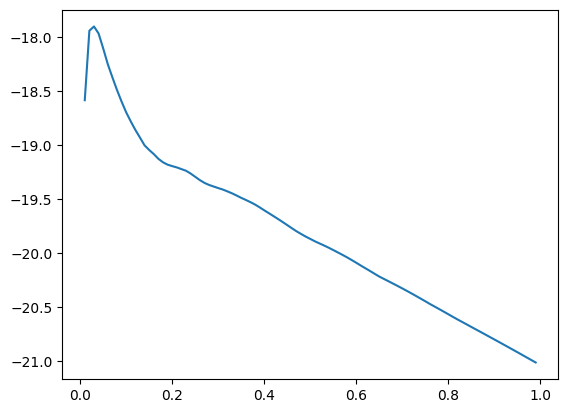

In [35]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml, X_train,y_train,scoring='neg_mean_absolute_error',cv = 3)))
plt.plot(alpha,error)

In [39]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err,columns=['alpha','error'])
df_err[df_err.error== max(df_err.error)]

,alpha,error
2,0.03,-17.90074


In [42]:
# Random Forest regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf, X_train,y_train,scoring='neg_mean_absolute_error',cv = 3))

np.float64(-14.969322796492847)

In [49]:
# tune models gridsearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('squared_error', 'absolute_error'), 'max_features':('auto','sqrt','log2')}
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv = 3)
gs.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
174 fits failed out of a total of 522.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
174 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [50]:
gs.best_score_

np.float64(-15.22571702949241)

In [51]:
gs.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=280)

In [55]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml= lm_l.predict(X_test)
tpred_rf= gs.best_estimator_.predict(X_test)

In [58]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error = (y_test,tpred_lm)


In [59]:
mean_absolute_error = (y_test,tpred_lml)


In [60]:
mean_absolute_error = (y_test,tpred_rf)